# Dataset

## Animations Rating on Crunchyroll


All of the content in Dataset comes from Crunchyroll, a Japanese animation streaming platform that is widely acclaimed in Europe and the United State, collection of more than thirteen hundred animations and their rating information. I tried to use it to analyze the most popular Japanese animations of all time.
In addition, it is well known that during the development of Japanese animation, the drawing style has undergone some changes. Different artists have their own representative styles, so I also wanted to find out if the different eras of animation also had an effect on the popularity.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


First I want to know the trend of Crunchyroll usage. That is, whether the number of people using Crunchyroll ratings has increased over time. This way, when analyzing a specific animation, it will be possible to refer to its year and compare it with animations from different years.

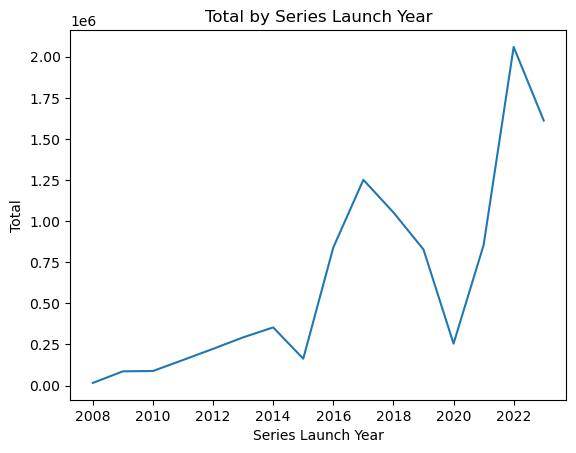

In [17]:
yearly_totals = anime_df.groupby('series_launch_year')['total'].sum().reset_index()

sns.lineplot(data=yearly_totals, x='series_launch_year', y='total')

plt.title('Total by Series Launch Year')
plt.xlabel('Series Launch Year')
plt.ylabel('Total')

plt.show()

Then we can compare the popularity of all the anime. The first question is, what is the most popular animation on Crunchyroll of all time?

In [19]:
anime_df = pd.read_csv('C:/Users/70794/Crunchyroll.csv', delimiter=",", encoding='ISO-8859-1')

In [20]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1269 non-null   object 
 1   series_launch_year  1269 non-null   int64  
 2   season_count        1269 non-null   int64  
 3   total               1269 non-null   int64  
 4   average             1269 non-null   float64
 5   1s                  1269 non-null   float64
 6   2s                  1269 non-null   float64
 7   3s                  1269 non-null   float64
 8   4s                  1269 non-null   float64
 9   5s                  1269 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 99.3+ KB


Here are the ten anime with the highest average scores.

In [23]:
top_10_average = anime_df.nlargest(10, "average")
top_10_average

,title,series_launch_year,season_count,total,average,1s,2s,3s,4s,5s
701,NatsumeYujin-cho6,2017,1,1232,5.0,68.0,68.0,188.0,325.0,957.0
1017,TheApothecaryDiaries,2023,1,29372,5.0,50.0,5.0,9.0,7.0,30.0
5,86EIGHTY-SIX,2021,1,52155,4.9,346.0,186.0,525.0,2.0,49.0
51,AttackonTitan,2013,5,213389,4.9,44.0,30.0,88.0,260.0,1.0
64,Barakamon,2014,1,4775,4.9,50.0,3.0,5.0,11.0,21.0
90,BLUELOCK,2022,1,110902,4.9,58.0,34.0,84.0,239.0,1.1
91,BOCCHITHEROCK!,2022,1,36086,4.9,259.0,129.0,375.0,1.5,22.3
104,BuddyDaddies,2023,1,31765,4.9,237.0,158.0,389.0,740.0,3.0
109,BungoStrayDogsWAN!,2021,1,4130,4.9,130.0,46.0,69.0,145.0,1.4
119,CampfireCookinginAnotherWorldwithMyAbsurdSkill,2023,1,47075,4.9,33.0,21.0,102.0,223.0,471.0


Surprisingly, Natsume Yujin-cho received a high score of 5.0 at the top of the list. The animated film was very well received in East Asia, and although it received a high score on Crunchyroll, only 1,232 people rated it.

In contrast, Attack on Titan still boasts a 4.9 out of 5 rating when it has over 210,000 ratings. And then there's Blue Lock, the new 2022 animation, which has already been rated by 110,000 people, again with a 4.9 rating. This is a soccer animation.

Considering the concept of popularity, the number of people involved in scoring is also very important. Next I will filter the number of raters. Only look at animations more than 100,000 ratings.

In [6]:
total_data = anime_df[anime_df["total"] > 100000][['total', 'title', 'average','series_launch_year']]
sorted_total = total_data.sort_values(by='total', ascending=False)

sorted_total

,total,title,average,series_launch_year
737,361813,OnePiece,4.9,2021
199,342637,DemonSlayer:KimetsunoYaiba,4.9,2019
134,282773,ChainsawMan,4.9,2022
457,271960,JUJUTSUKAISEN,4.9,2017
954,245739,SPYxFAMILY,4.9,2018
51,213389,AttackonTitan,4.9,2013
672,153569,MyHeroAcademia,4.7,2023
663,131340,MushokuTensei:JoblessReincarnation,4.8,2014
696,129345,NarutoShippuden,4.7,2016
90,110902,BLUELOCK,4.9,2022


A total of 13 animations have received more than 100,000 ratings. And they all have 4.7+ ratings. Not surprisingly the One Piece came in at number one. In comparison Attack on Titan is even behind Spy Family, which exploded onto the scene a few years ago.
It's also worth noting that with the exception of Spy Family, BlueLock, and My Dress-Up Darling, the other three are classified as battle dramas. A comparison with Asian animation platforms might allow us to further analyze the preferences of animation viewers in different regions.

Then, I would like to explore the relationship between the era of animation and popularity through drawing.

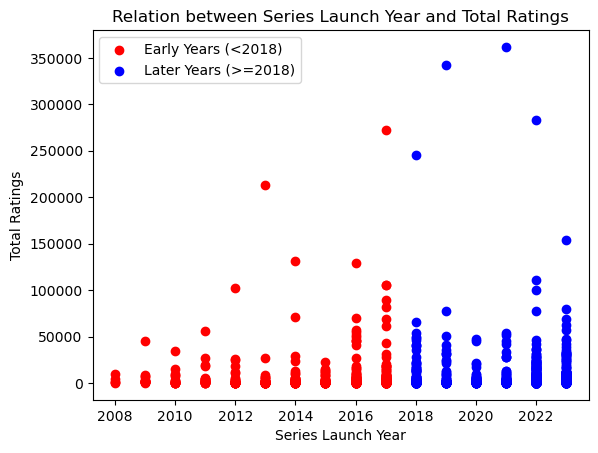

In [7]:
draw_data = anime_df[['title', 'series_launch_year', 'total']]

early_years = draw_data[draw_data['series_launch_year'] < 2018]
later_years = draw_data[draw_data['series_launch_year'] >= 2018]

fig, ax = plt.subplots()

ax.scatter(early_years['series_launch_year'], early_years['total'], color='red', label='Early Years (<2018)')
ax.scatter(later_years['series_launch_year'], later_years['total'], color='blue', label='Later Years (>=2018)')

plt.xlabel('Series Launch Year')
plt.ylabel('Total Ratings')
plt.title('Relation between Series Launch Year and Total Ratings')
plt.legend()

plt.show()

Using 5 years ago as a boundary, it is clear that more people have watched new animations since 2018 compared to before 2018.
So far in 2018, two animations have over 300,000 ratings and two have over 200,000 ratings. While before 2018 only two animations had more than 200,000 ratings. On the other hand, in the range of 100,000 to 200,000 ratings, pre-2018 animations performed better.
Therefore, although the new animation is more in line with the current aesthetics in terms of story and style, the old classic animation is also popular and has been around for a long time.

Finally, in addition to exploring the popularity of anime amongst themselves, we wondered: what year was actually the golden age of Japanese animation?
So, I'm going to use a cutoff of 4.5 to see which year has the most high-scoring anime.

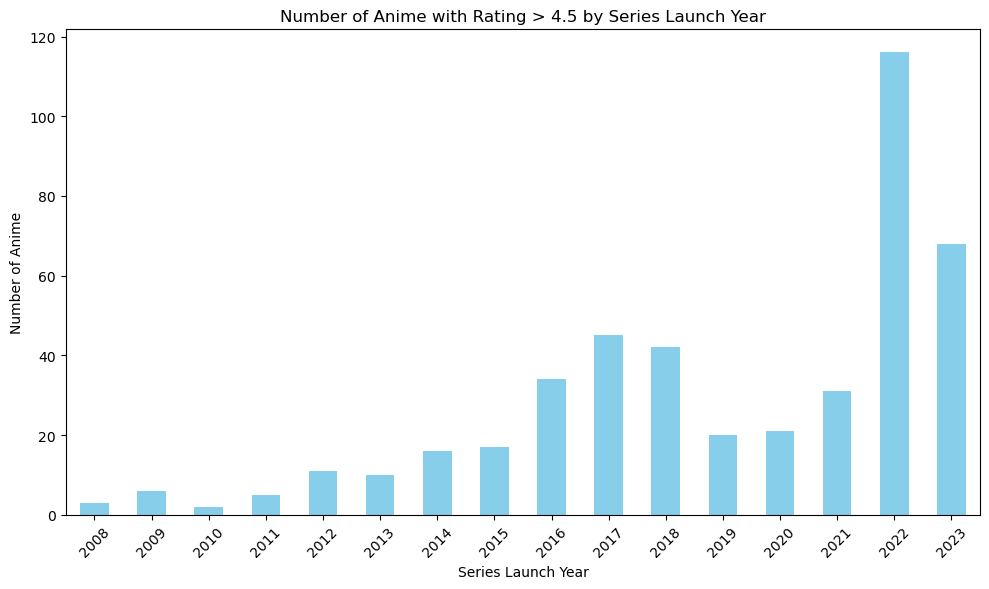

In [46]:
rating_threshold = 4.5

high_rated_anime = anime_df[anime_df['average'] > rating_threshold]
high_rated_by_year = high_rated_anime.groupby('series_launch_year').size()

years_with_high_rating = high_rated_by_year.index.tolist()

all_years = pd.Series(index=range(anime_df['series_launch_year'].min(), anime_df['series_launch_year'].max() + 1))
all_years.fillna(0, inplace=True)

all_years.update(high_rated_by_year)

plt.figure(figsize=(10, 6))
all_years.plot(kind='bar', color='skyblue')

plt.title('Number of Anime with Rating > 4.5 by Series Launch Year')
plt.xlabel('Series Launch Year')
plt.ylabel('Number of Anime')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Obviously easy to see that 2022 wins. The next best thing is this year - 2023. Comparing this chart to the chart of total number of ratings at the very beginning of the document shows that the rate of high ratings is the same as the number of ratings each year.

At the end of the assignment, I will close by listing the five anime with the highest number of ratings in 2016, 2017, 2018 ,2022 and 2023.

In [58]:
anime_2016 = anime_df[anime_df['series_launch_year'] == 2016]
top_5_anime_2016 = anime_2016.nlargest(5, 'total')[['title', 'total']]

top_5_anime_2016

,title,total
696,NarutoShippuden,129345
467,KAGUYA-SAMA:LOVEISWAR,69703
1149,Tomo-chanIsaGirl!,56985
981,SwordArtOnline,54680
1123,TheWorld'sFinestAssassinGetsReincarnatedinAnot...,51281


In [59]:
anime_2017 = anime_df[anime_df['series_launch_year'] == 2017]
top_5_anime_2017 = anime_2017.nlargest(5, 'total')[['title', 'total']]

top_5_anime_2017

,title,total
457,JUJUTSUKAISEN,271960
1011,ThatTimeIGotReincarnatedasaSlime,105216
80,BlackClover,105102
1105,TheRisingoftheShieldHero,88826
151,ClassroomoftheElite,82265


In [60]:
anime_2018 = anime_df[anime_df['series_launch_year'] == 2018]
top_5_anime_2018 = anime_2018.nlargest(5, 'total')[['title', 'total']]

top_5_anime_2018

,title,total
954,SPYxFAMILY,245739
598,MASHLE:MAGICANDMUSCLES,66069
1198,VINLANDSAGA,53257
925,SkeletonKnightinAnotherWorld,49296
1170,TSUKIMICHI-MoonlitFantasy-,48910


In [61]:
anime_2011 = anime_df[anime_df['series_launch_year'] == 2010]
top_5_anime_2011 = anime_2011.nlargest(5, 'total')[['title', 'total']]

top_5_anime_2011

,title,total
905,Shikimori'sNotJustaCutie,34262
748,ORIENT,15087
1116,TheTestamentofSisterNewDevil,10077
197,DemonKingDaimao,8507
537,LifeLessonswithUramichiOniisan,7873


In [62]:
anime_2022 = anime_df[anime_df['series_launch_year'] == 2022]
top_5_anime_2022 = anime_2022.nlargest(5, 'total')[['title', 'total']]
top_5_anime_2022

,title,total
134,ChainsawMan,282773
90,BLUELOCK,110902
370,Hell'sParadise,99890
393,Horimiya,77669
81,BlackSummoner,46314


In [63]:
anime_2023 = anime_df[anime_df['series_launch_year'] == 2023]
top_5_anime_2023 = anime_2023.nlargest(5, 'total')[['title', 'total']]
top_5_anime_2023

,title,total
672,MyHeroAcademia,153569
756,Overlord,79102
408,IGotaCheatSkillinAnotherWorldandBecameUnrivale...,68645
820,Rent-a-Girlfriend,62717
676,MyLoveStorywithYamada-kunatLv999,57430


So is it popular anime that attracts people to watch it, or is it the number of people watching it that makes it popular? This is a topic worth exploring.